# Final Project - PGA Stats - Notebook #1
### Isaac Meadow, Jackson Skahill, Alex Eichmann

In [1]:
import pandas as pd

In [2]:
# Load the merged data created in Notebook 1
all_tour_data = pd.read_csv("final_merged_data.csv")

display(all_tour_data.head())

,Player,Fairway Percentage,Year,gir,Average Putts,Average Scrambling,Average Score,Points,Rounds,Avg Distance
0,Henrik Stenson,75.19,2018,73.51,29.93,60.67,69.617,868,60.0,291.5
1,Ryan Armour,73.58,2018,68.22,29.31,60.13,70.758,"1,006",109.0,283.5
2,Chez Reavie,72.24,2018,68.67,29.12,62.27,70.432,"1,020",93.0,286.5
3,Ryan Moore,71.94,2018,68.80,29.17,64.16,70.015,795,78.0,289.2
4,Brian Stuard,71.44,2018,67.12,29.11,59.23,71.038,421,103.0,278.9


### Question 1
#### Does driving accuracy significantly impact overall player performance?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import numpy as np

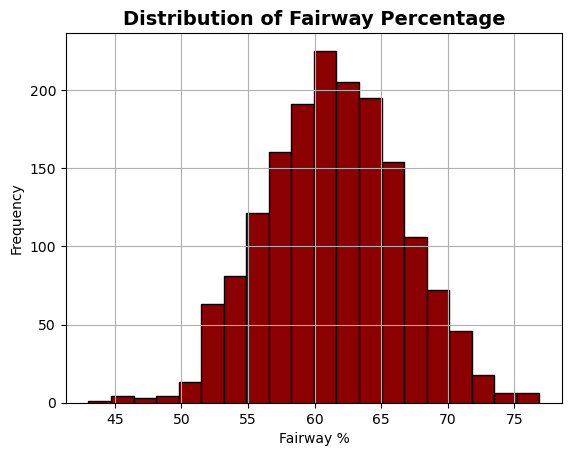

In [32]:
# Simple colorful histogram
all_tour_data["Fairway Percentage"].hist(
    bins=20,
    edgecolor='black',
    color='darkred' 
)

plt.title("Distribution of Fairway Percentage", fontsize=14, fontweight='bold')
plt.xlabel("Fairway %")
plt.ylabel("Frequency")
plt.show()

In [10]:
all_tour_data["Points"] = pd.to_numeric(all_tour_data["Points"], errors="coerce")

<Figure size 1000x600 with 0 Axes>

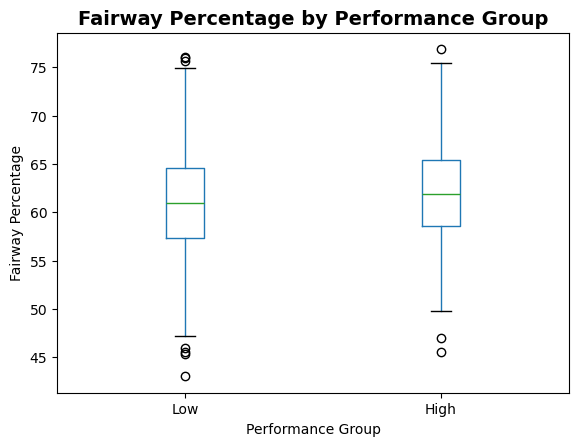

In [31]:
all_tour_data["Performance Group"] = pd.qcut(all_tour_data["Points"], q=2, labels=["Low", "High"])

plt.figure(figsize=(10, 6))

all_tour_data.boxplot(column="Fairway Percentage", by="Performance Group", grid=False)

plt.title("Fairway Percentage by Performance Group", fontsize=14, fontweight='bold')
plt.suptitle("")  
plt.xlabel("Performance Group")
plt.ylabel("Fairway Percentage")

plt.show()

In [12]:
accurate = all_tour_data[all_tour_data["Fairway Percentage"] > 65]["Points"]
less_accurate = all_tour_data[all_tour_data["Fairway Percentage"] <= 65]["Points"]

t_stat, p_val = ttest_ind(accurate.dropna(), less_accurate.dropna())
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 2.308743778954412
P-value: 0.021103699601085667


In [13]:
ml_data = all_tour_data[["Fairway Percentage", "Points"]].dropna()
X= ml_data[["Fairway Percentage"]]
y = ml_data["Points"]

model = LinearRegression()
model.fit(X, y)

print("R-squared", model.score(X, y))
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

R-squared 0.012439234379812092
Intercept: 151.41845754566754
Slope: 5.203718514805963


### Question 2
#### Do players with higher driving distance sacrifice accuracy, and how does this tradeoff impact overall performance?

<function matplotlib.pyplot.show(close=None, block=None)>

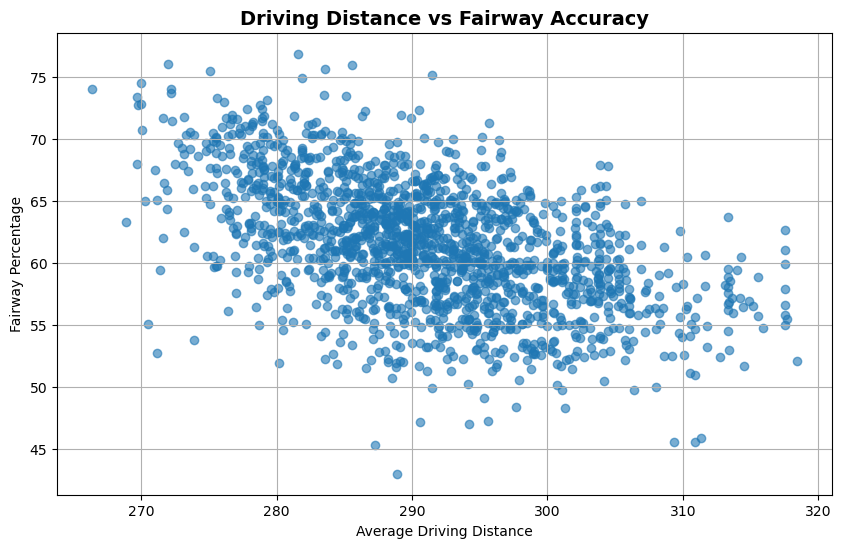

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(all_tour_data["Avg Distance"], all_tour_data["Fairway Percentage"], alpha=0.6)
plt.title("Driving Distance vs Fairway Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Average Driving Distance")
plt.ylabel("Fairway Percentage")
plt.grid(True)
plt.show

In [15]:
from scipy.stats import ttest_ind

long_hitters = all_tour_data[all_tour_data["Avg Distance"] > 305]["Fairway Percentage"]
short_hitters = all_tour_data[all_tour_data["Avg Distance"] <=305]["Fairway Percentage"]

t_stat2, p_val2 = ttest_ind(long_hitters.dropna(), short_hitters.dropna())
print("T-statistic:", t_stat2)
print("P-value:", p_val2)

T-statistic: -10.783084519807305
P-value: 2.954883963722731e-26


### Question 3
#### How do putting statistics correlate with total strokes gained and tournament success? 

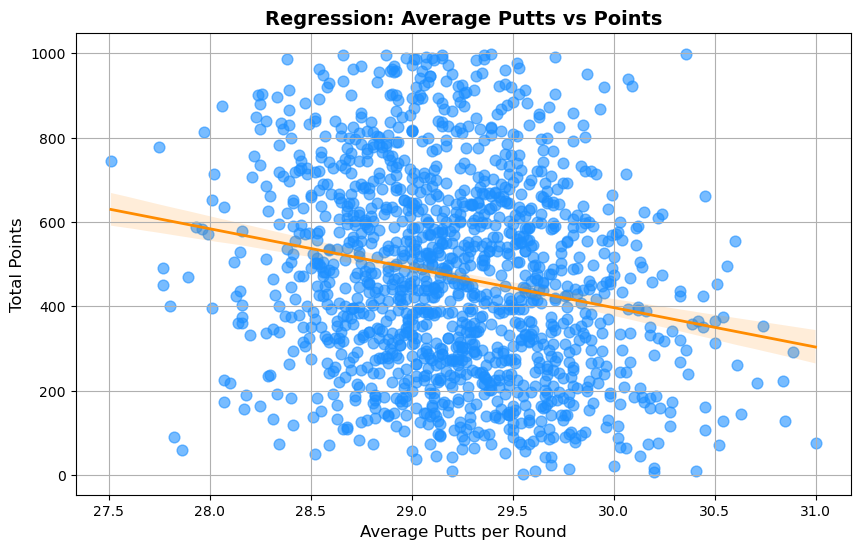

In [38]:
plot_data = all_tour_data[["Average Putts", "Points"]].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(
    data=plot_data,
    x="Average Putts",
    y="Points",
    scatter_kws={"s": 60, "alpha": 0.6, "color": "dodgerblue"},
    line_kws={"color": "darkorange", "lw": 2}
)

plt.title("Regression: Average Putts vs Points", fontsize=14, fontweight='bold')
plt.xlabel("Average Putts per Round", fontsize=12)
plt.ylabel("Total Points", fontsize=12)
plt.grid(True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Prepare the data
features = ["Fairway Percentage", "Avg Distance", "Average Putts", "Average Score"]
data = all_tour_data.dropna(subset=features + ["Performance Group"])
X = data[features]
y = data["Performance Group"].map({"Low": 0, "High": 1})

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN 
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
print("KNN — Accuracy:", round(accuracy_score(y_test, knn_pred), 3))
print("KNN — F1 Score:", round(f1_score(y_test, knn_pred), 3))

# Logistic Regression 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
print("Logistic Regression — Accuracy:", round(accuracy_score(y_test, logreg_pred), 3))
print("Logistic Regression — F1 Score:", round(f1_score(y_test, logreg_pred), 3))

# Decision Tree 
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
tree_pred = tree.predict(X_test_scaled)
print("Decision Tree — Accuracy:", round(accuracy_score(y_test, tree_pred), 3))
print("Decision Tree — F1 Score:", round(f1_score(y_test, tree_pred), 3))

KNN — Accuracy: 0.749
KNN — F1 Score: 0.759
Logistic Regression — Accuracy: 0.785
Logistic Regression — F1 Score: 0.787
Decision Tree — Accuracy: 0.685
Decision Tree — F1 Score: 0.688


### Question 4
#### How has the average score changed over each year?

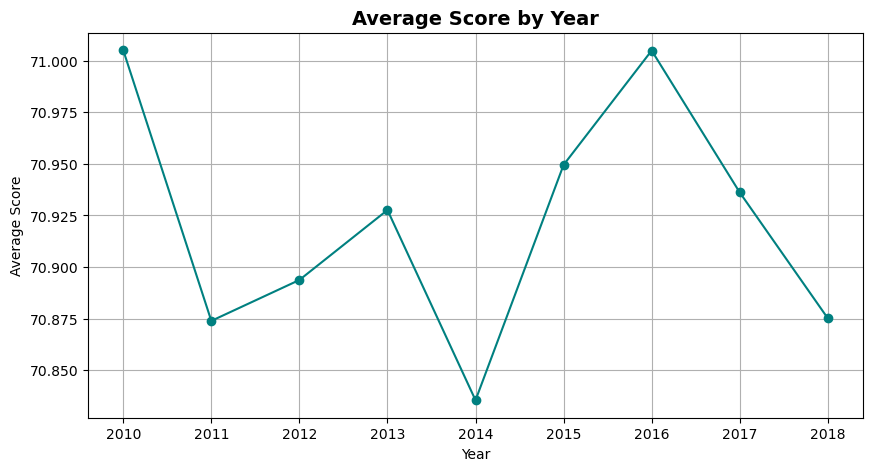

In [41]:
# Drop missing values and group by Year
avg_score_by_year = all_tour_data.dropna(subset=["Average Score", "Year"])
avg_score_by_year = avg_score_by_year.groupby("Year")["Average Score"].mean()

# Plot
plt.figure(figsize=(10, 5))
avg_score_by_year.plot(marker='o', color='teal')
plt.title("Average Score by Year", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()